In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch
import torch.nn as nn
import pandas as pd

# 1. Define the Perceptron Function

In [2]:
class Perceptron(nn.Module):
    """ A Perceptron is one Linear layer """
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """The forward pass of the MLP
        Args:
            x_in (torch.Tensor): an input data tensor.
            x_in.shape should be (batch, input_dim)
        Returns:
            the resulting tensor. tensor.shape should be (batch, 1)
        """
        return torch.sigmoid(self.fc1(x_in))
    
perceptron = Perceptron(input_dim=2)

# 2. Data Generation

In [3]:
left_center  = (3, 3)
right_center = (3, -2)

In [4]:
def get_toy_data(batch_size, left_center=left_center, right_center=right_center):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

### Sample size = 20 

In [5]:
batch_size     = 30
x_data, y_data = get_toy_data(batch_size=batch_size)

/var/folders/6s/wxmy299j1592tl76rwp6kg3h0000gn/T/ipykernel_26934/1802577198.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1695391830591/work/torch/csrc/utils/tensor_new.cpp:264.)
  return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)


In [6]:
x_data

tensor([[ 2.7104, -2.3213],
        [ 4.1496,  3.3858],
        [ 2.8903,  3.4918],
        [ 2.5984, -2.8094],
        [ 3.6674, -1.6744],
        [ 1.9956, -2.3851],
        [ 1.6847,  3.0371],
        [ 1.9471,  1.6833],
        [ 2.9925, -1.4893],
        [ 3.0489,  2.7597],
        [ 3.7069,  1.4569],
        [ 2.1466, -2.1829],
        [ 3.0365,  1.9636],
        [ 3.9835, -0.3091],
        [ 2.6101,  2.5730],
        [ 2.6553, -2.9755],
        [ 2.0584, -2.4985],
        [ 4.4836,  2.7220],
        [ 2.9088,  5.0267],
        [ 0.9639, -2.3109],
        [ 2.6608, -3.0436],
        [ 2.2244,  3.3692],
        [ 3.0745,  2.8960],
        [ 3.6247, -3.0864],
        [ 4.2521, -1.1661],
        [ 3.6620, -1.2373],
        [ 1.6495,  2.5327],
        [ 3.1371,  3.6502],
        [ 4.5396,  3.0892],
        [ 1.2569, -1.4327]])

In [7]:
y_data

tensor([1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.])

# 3. Create the Contour Lines

### Turning the tensor data to arrays

In [8]:
n_classes=2
x_data    = x_data.numpy()
y_data    = y_data.numpy().astype(np.int32)

In [9]:
### all_x[0] stores the x coordinates for y=0 observations 
### all_x[1] stores the x coordinates for y=1 observations 

all_x = [[] for _ in range(n_classes)]
for x_i, y_i in zip(x_data,y_data):
    all_x[y_i].append(x_i)
    
all_x

[[array([4.149592 , 3.3858068], dtype=float32),
  array([2.8903475, 3.4917686], dtype=float32),
  array([1.6846516, 3.037144 ], dtype=float32),
  array([1.947062 , 1.6832937], dtype=float32),
  array([3.048863, 2.759749], dtype=float32),
  array([3.706896 , 1.4569017], dtype=float32),
  array([3.0364678, 1.9635779], dtype=float32),
  array([2.6101344, 2.5729547], dtype=float32),
  array([4.4835734, 2.7219818], dtype=float32),
  array([2.908813, 5.026676], dtype=float32),
  array([2.2244189, 3.3691978], dtype=float32),
  array([3.074518, 2.896022], dtype=float32),
  array([1.6495   , 2.5327234], dtype=float32),
  array([3.1370785, 3.650216 ], dtype=float32),
  array([4.5395646, 3.0891876], dtype=float32)],
 [array([ 2.710432 , -2.3213153], dtype=float32),
  array([ 2.598384 , -2.8093586], dtype=float32),
  array([ 3.6674478, -1.6744418], dtype=float32),
  array([ 1.9956175, -2.3851175], dtype=float32),
  array([ 2.9924586, -1.4892895], dtype=float32),
  array([ 2.146602 , -2.1828763], d

In [10]:
all_x = [np.stack(x_list) for x_list in all_x]

In [11]:
x_1_lim = (min([x_list[:,0].min() for x_list in all_x]), max([x_list[:,0].max() for x_list in all_x]))
x_2_lim = (min([x_list[:,1].min() for x_list in all_x]), max([x_list[:,1].max() for x_list in all_x]))

In [12]:
### the min and max for x1
x_1_lim

(0.9639266, 4.5395646)

In [13]:
### the min and max for x2
x_2_lim

(-3.0863605, 5.026676)

In [14]:
xx1 = np.linspace(x_1_lim[0], x_1_lim[1], 10)
xx2 = np.linspace(x_2_lim[0], x_2_lim[1], 10)

In [15]:
### Evenly spaced numbers over x_1_lim[0] and x_1_lim[1]
xx1

array([0.96392661, 1.36121972, 1.75851283, 2.15580595, 2.55309906,
       2.95039217, 3.34768528, 3.74497839, 4.1422715 , 4.53956461])

In [16]:
### Evenly spaced numbers over x_2_lim[0] and x_2_lim[1]
xx2

array([-3.08636045, -2.18491194, -1.28346343, -0.38201491,  0.5194336 ,
        1.42088212,  2.32233063,  3.22377915,  4.12522766,  5.02667618])

In [17]:
XX1, XX2 = np.meshgrid(xx1, xx2)

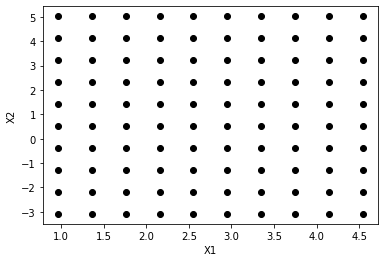

In [18]:
### A list of coordinate matrices from coordinate vectors.
plt.plot(XX1, XX2, marker='o', color='k', linestyle='none')
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [19]:
### coordinates for XX1, XX2, from left bottom corner to right top corner
x1x2 = np.vstack([XX1.ravel(), XX2.ravel()]).T
x1x2

array([[ 0.96392661, -3.08636045],
       [ 1.36121972, -3.08636045],
       [ 1.75851283, -3.08636045],
       [ 2.15580595, -3.08636045],
       [ 2.55309906, -3.08636045],
       [ 2.95039217, -3.08636045],
       [ 3.34768528, -3.08636045],
       [ 3.74497839, -3.08636045],
       [ 4.1422715 , -3.08636045],
       [ 4.53956461, -3.08636045],
       [ 0.96392661, -2.18491194],
       [ 1.36121972, -2.18491194],
       [ 1.75851283, -2.18491194],
       [ 2.15580595, -2.18491194],
       [ 2.55309906, -2.18491194],
       [ 2.95039217, -2.18491194],
       [ 3.34768528, -2.18491194],
       [ 3.74497839, -2.18491194],
       [ 4.1422715 , -2.18491194],
       [ 4.53956461, -2.18491194],
       [ 0.96392661, -1.28346343],
       [ 1.36121972, -1.28346343],
       [ 1.75851283, -1.28346343],
       [ 2.15580595, -1.28346343],
       [ 2.55309906, -1.28346343],
       [ 2.95039217, -1.28346343],
       [ 3.34768528, -1.28346343],
       [ 3.74497839, -1.28346343],
       [ 4.1422715 ,

In [20]:
### prediction (heights) for each points in x1x2
Z = perceptron(torch.tensor(x1x2, dtype=torch.float32)).detach().numpy().reshape(XX1.shape)
Z

array([[0.8878593 , 0.9049138 , 0.9196095 , 0.93220407, 0.9429479 ,
        0.95207673, 0.95980704, 0.9663345 , 0.971833  , 0.9764554 ],
       [0.8417053 , 0.8647095 , 0.884828  , 0.90229267, 0.9173565 ,
        0.9302773 , 0.9413073 , 0.9506849 , 0.95863   , 0.9653417 ],
       [0.7812362 , 0.8110553 , 0.8376545 , 0.8611502 , 0.8817256 ,
        0.8996074 , 0.9150463 , 0.9283001 , 0.9396225 , 0.94925475],
       [0.705743  , 0.7424602 , 0.7760497 , 0.8064006 , 0.83352053,
        0.8575127 , 0.8785511 , 0.8968568 , 0.9126775 , 0.92627114],
       [0.6169709 , 0.6594195 , 0.6994553 , 0.73666424, 0.7707763 ,
        0.80165917, 0.8293027 , 0.8537962 , 0.87530357, 0.8940397 ],
       [0.51964587, 0.56528056, 0.6098349 , 0.6526291 , 0.6930916 ,
        0.73078513, 0.7654162 , 0.796831  , 0.8250005 , 0.8499997 ],
       [0.42080665, 0.4661853 , 0.5121305 , 0.55787164, 0.6026516 ,
        0.6457759 , 0.6866535 , 0.72482383, 0.75996983, 0.79191566],
       [0.32793278, 0.3696887 , 0.4134902

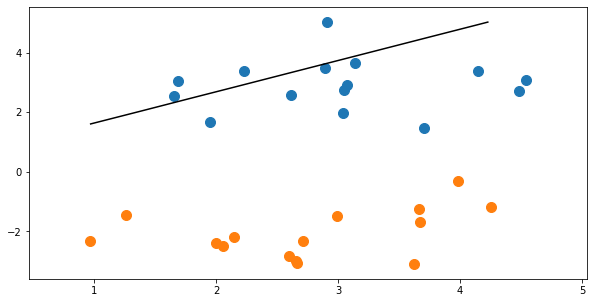

In [21]:
level = 0.5
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
margin=0.5
ax.set_xlim(x_1_lim[0]-margin,x_1_lim[1]+margin)
ax.set_ylim(x_2_lim[0]-margin,x_2_lim[1]+margin)
for x_list in all_x:
    ax.scatter(x_list[:,0],x_list[:,1], s=100)
ax.contour(XX1, XX2, Z, colors='k', levels=[level], linestyles=['-'])
plt.show()

In [22]:
### the numbers in the tables are predictions(heights)
### column names are the x1 coordinates
### index names are the x2 coordinates
df         = pd.DataFrame(Z)
df.columns = xx1
df.index   = xx2
df

,0.963927,1.361220,1.758513,2.155806,2.553099,2.950392,3.347685,3.744978,4.142271,4.539565
-3.086360,0.887859,0.904914,0.919609,0.932204,0.942948,0.952077,0.959807,0.966335,0.971833,0.976455
-2.184912,0.841705,0.864709,0.884828,0.902293,0.917356,0.930277,0.941307,0.950685,0.958630,0.965342
-1.283463,0.781236,0.811055,0.837654,0.861150,0.881726,0.899607,0.915046,0.928300,0.939623,0.949255
-0.382015,0.705743,0.742460,0.776050,0.806401,0.833521,0.857513,0.878551,0.896857,0.912678,0.926271
0.519434,0.616971,0.659419,0.699455,0.736664,0.770776,0.801659,0.829303,0.853796,0.875304,0.894040
1.420882,0.519646,0.565281,0.609835,0.652629,0.693092,0.730785,0.765416,0.796831,0.825001,0.850000
2.322331,0.420807,0.466185,0.512130,0.557872,0.602652,0.645776,0.686653,0.724824,0.759970,0.791916
3.223779,0.327933,0.369689,0.413490,0.458705,0.504610,0.550437,0.595424,0.638862,0.680143,0.718781
4.125228,0.246822,0.282592,0.321335,0.362705,0.406212,0.451243,0.497087,0.542980,0.588154,0.631891
5.026676,0.180388,0.209205,0.241270,0.276532,0.314808,0.355778,0.398974,0.443803,0.489565,0.535503


In [23]:
### Find the points that are close to the prespecified height level (0.5)
target_value = 0.5
tolerance    = 0.01
points = []
for column in df.columns:
    for index in df.index:
        value = df.loc[index, column]
        if abs(value - target_value) < tolerance:
            points.append((index, column))
points

[(3.2237791485256615, 2.5530990560849505),
 (4.125227663252089, 3.3476852774620056)]

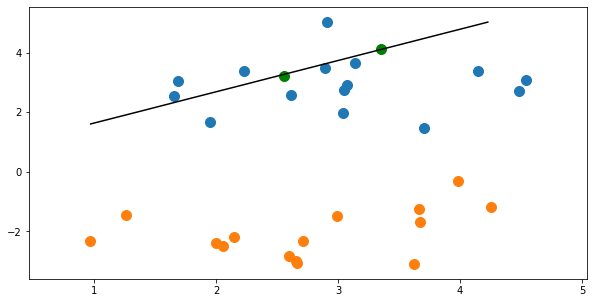

In [24]:
##### As seen, the contour lines is close to the line generated by the green points
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
margin=0.5
ax.set_xlim(x_1_lim[0]-margin,x_1_lim[1]+margin)
ax.set_ylim(x_2_lim[0]-margin,x_2_lim[1]+margin)
for x_list in all_x:
    ax.scatter(x_list[:,0],x_list[:,1], s=100)
ax.contour(XX1, XX2, Z, colors='k', levels=[0.5], linestyles=['-'])
for coord in points:
    y, x = coord
    ax.scatter(x, y, color='green',s=100)
plt.show()

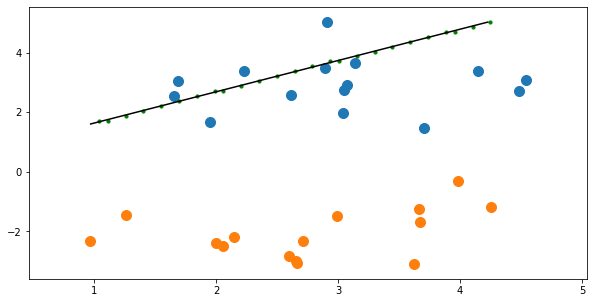

In [25]:
### when using a more granular for np.linspace
xx1 = np.linspace(x_1_lim[0], x_1_lim[1], 50)
xx2 = np.linspace(x_2_lim[0], x_2_lim[1], 50)
XX1, XX2 = np.meshgrid(xx1, xx2)
x1x2 = np.vstack([XX1.ravel(), XX2.ravel()]).T
Z = perceptron(torch.tensor(x1x2, dtype=torch.float32)).detach().numpy().reshape(XX1.shape)
df         = pd.DataFrame(Z)
df.columns = xx1
df.index   = xx2
### Find the points that are close to the prespecified height level (0.5)
target_value = 0.5
tolerance    = 0.005
points = []
for column in df.columns:
    for index in df.index:
        value = df.loc[index, column]
        if abs(value - target_value) < tolerance:
            points.append((index, column))
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
margin=0.5
ax.set_xlim(x_1_lim[0]-margin,x_1_lim[1]+margin)
ax.set_ylim(x_2_lim[0]-margin,x_2_lim[1]+margin)
for x_list in all_x:
    ax.scatter(x_list[:,0],x_list[:,1], s=100)
ax.contour(XX1, XX2, Z, colors='k', levels=[0.5], linestyles=['-'])
for coord in points:
    y, x = coord
    ax.scatter(x, y, color='green',s=10)
plt.show()